In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor
import math
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os.path

# TODO CELL VELOCITIES
# TODO INSPECT THE MONOMERS; WRITE MONOMER CODE

# Setup

In [2]:
with_obstacles = False



data_from = ''
path = "Data/" + data_from

csv = ".csv"

def getConstants(config):
    name = 'constants.csv'
    constants = pd.read_csv("Data/" + config + name)
    out = {}
    out['avg'] = int(constants['average_particles_per_cell'])
    #out['t'] = int(constants['timesteps'])
    out['delta_t'] = float(constants['time_lapse'])
    out['a'] = int(constants['cell_dim'])
    out['w'] = int(constants['width'])
    out['h'] = int(constants['height'])
    out['num_particles'] = int(constants['total_number_of_particles'])
    out['m'] = int(constants['particle_mass'])
    out['k_BT'] = float(constants['k_BT'])
    out['g'] = float(constants['g'])
    return out

constants = getConstants(data_from)
x_dim = constants['w']
y_dim = constants['h']
station

## Load Monomers

In [3]:
def load_monomers(path, constants):
    monomers_t = []

    # Loading particles
    print('Loading Monomers ..')
    filenames_monomers = glob.glob('{}*.csv'.format(path))
    for it, file in enumerate(filenames_monomers):
        monomers_t.append(pd.read_csv(file))
        if (it % 500 == 0):
            print('--loaded {}'.format(it))
    print('Monomers loaded and saved!\n')
    # Monomers loaded
    return monomers_t


def load_particles(path):
    num_timesteps = len(monomers_t)

    # Loading particles
    print('Loading particles ..')
    filenames_particles = glob.glob('{}*.csv'.format(path))
    particles_t = []
    for file in filenames_particles:
        num = int(file.split('timestep')[1].replace(".csv", ""))
        if (num > num_timesteps - stationary):
            particles_t.append(pd.read_csv(file))
            if (num % 500 == 0):
                print('--loaded {}'.format(num))
    print('Particles loaded!\n')# and saved
    # Particles loaded
    
    return particles_t



def load_cells(path, columns, shown_rows, shown_cols):
    print('Loading cells')
    cells_timesteps = []

    filenames_cells = glob.glob('{}*.csv'.format(path))
    for it, file in enumerate(filenames_cells):
        if it > num_timesteps - stationary:
            df = pd.read_csv(file)
            cells_timesteps.append(df)
            if (it % 500 == 0):
                print('--loaded {}'.format(it))
        it += 1
    print('Cells loaded and saved!\n')
    # Cells loaded
    return cells_timesteps
    

monomers_t = load_monomers(path + f'monomers_av{constants["avg"]}', constants)
particles_t = load_particles(f'Data/particles_av{constants["avg"]}')
cells_path = path + 'cells_av{}'.format(constants['avg'])
cells_timesteps = load_cells(cells_path, columns, shown_rows, shown_cols)
I,J,U,V,pivots = prepare_cells(cells_timesteps, columns, shown_rows, shown_cols)

Loading Monomers ..
--loaded 0
--loaded 500
--loaded 1000
--loaded 1500
--loaded 2000
--loaded 2500
--loaded 3000
Monomers loaded and saved!

Loading particles ..


NameError: name 'stationary' is not defined

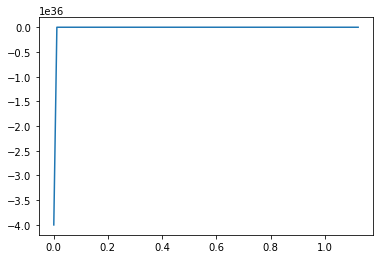

In [34]:
def truncLennardJones(d):
    tuning = 1
    diameter = 1
    f_abs = -4 * tuning * (math.pow(diameter, 12) / np.power(d, 12) + 6 * math.pow(diameter, 6) / np.power(d, 6));
    return f_abs

d = np.linspace(0.001, 2**(1/6), 100)
plt.plot(d, truncLennardJones(d), '-')
plt.show()

In [ ]:
from matplotlib import animation

fig = plt.figure()
ax = plt.axes(xlim=(0, 400), ylim=(0, 20))

point_size = 3
df = monomers_t[0]
scatter, = ax.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'red')

# animation function.  This is called sequentially
def animate(it):
    df = monomers_t[it]
    scatter.set_xdata(df['x'])
    scatter.set_ydata(df['y'])
    if (it % 100 == 0):
        print('--Created {} frame.\n'.format(it))
    return scatter,

anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames=len(monomers_t), blit=True)

anim.save('./Assets/monomer_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
print('Animated and saved!')

plt.show()
#plt.close()

KeyboardInterrupt: 

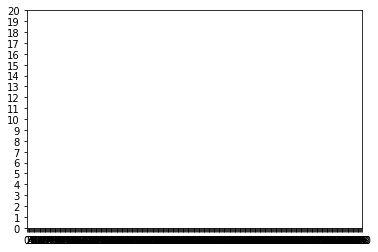

In [10]:
point_size = 3
for it, df in enumerate(monomers_t):
    scatter = plt.plot(df['x'], df['y'], 'o', markersize = point_size, color = 'red')
    plt.xlim((0, 400))
    plt.ylim((0, 20))
    plt.xticks([i for i in range(0,401)])
    plt.yticks([i for i in range(0,21)])
    #plt.grid()
    plt.savefig(f"Test/monomer_plot_{it}.png")
    plt.show()



In [22]:
num_timesteps = len(monomers_t) - 2
stationary = 1000 # last 1000

In [ ]:
x_region = (100, 200)
y_region = (0, y_dim)

def process_plotdata(x_region, y_region):
    x0_obstacles = x_region[0]
    x1_obstacles = x_region[1]
    y0_obstacles = y_region[0]
    y1_obstacles = y_region[1]
    x = np.arange(x0_obstacles, x1_obstacles)
    y = np.arange(y0_obstacles, y1_obstacles)
    X, Y = np.meshgrid(x, y)
    cells = cells_timesteps[-1]
    pivot = cells.reset_index().pivot(index = 'i', columns = 'j', values = 'num')
    vx = np.array([[cells['meanX'].loc[row, col] for col in x] for row in y])
    vy = np.array([[cells['meanY'].loc[row, col] for col in x] for row in y])
    return X, Y, vx, vy, pivot

X, Y, vx, vy, pivot = process_plotdata(x_region, y_region)

# some obstacles code

In [23]:
obstacles = None
if (with_obstacles):
    obstacles_path = path + 'constants_obstacles' + csv
    obstacles_csv = pd.read_csv(obstacles_path)
    obstacles = obstacles_csv[['x', 'y']]
    obstacle_radius = float(obstacles_csv['r'][0])

In [ ]:
from matplotlib import animation

print('Animating monomer ...')
# First set up the figure, the axis, and the plot element we want to animate
point_size = 0.1
fig = plt.figure()
ax = plt.axes(xlim=(0, 20), ylim=(0, 20))
initial_data = monomers_t[0]
scatter, = ax.plot(initial_data['x'], initial_data['y'], "o", markersize = point_size)
#ax.plot(monomers_t[0]['x'], monomers_t[0]['y'], markersize = 20 * point_size, color = 'red')


# initialization function: plot the background of each frame
def init():
    #quiv.set_data([], [], [], [])
    return scatter,

# animation function.  This is called sequentially
def animate(it):
    monomers = monomers_t[it]
    scatter.set_xdata(monomers['x'])
    scatter.set_ydata(monomers['y'])
    if (it % 10 == 0):
        print('--Created {} frame.\n'.format(it))
    return scatter,

# call the animator.  blit=True means only re-draw the parts that have changed.
print('animating')
anim = animation.FuncAnimation(fig, animate, #init_func=init,
                               frames=timesteps, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('./Assets/monomer_animation.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
print('Animated and saved!')

plt.close()

# Plot

Plotting data ..
Data plotted and saved!


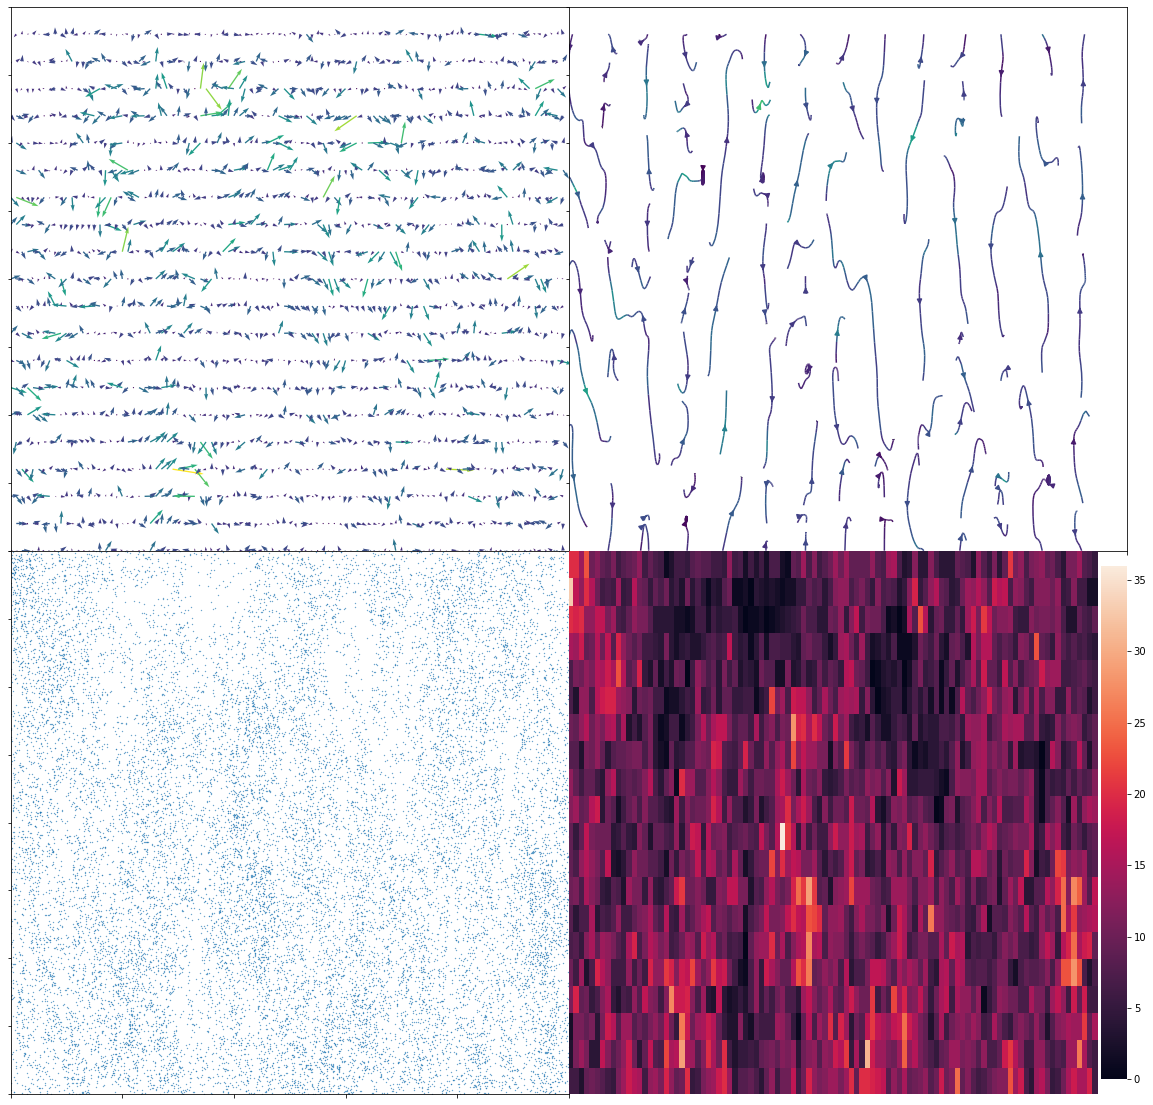

In [113]:
print('Plotting data ..')
fig = plt.figure(figsize=(20,20))
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]


for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    #a.set_aspect('equal')
    
fig.subplots_adjust(wspace=0, hspace=0)

color = np.sqrt(vx**2 + vy**2)
point_size = 0.3

if with_obstacles:
    for index, o in obstacles.iterrows():
        circle1 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'orange')
        circle2 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'orange')
        #circle3 = plt.Circle((o['x'], o['y']), obstacle_radius, color = 'black')
        #circles.append(circle)
        ax[1].add_artist(circle1)
        ax[2].add_artist(circle2)
        #ax[3].add_artist(circle3)
        #ax[0].xaxis.set_ticks([])

#ax[0].xaxis.set_ticks([])
#ax[0].yaxis.set_ticks([])
ax[0].quiver(X, Y, vx, vy, color)
ax[0].set(xlim=x_region, ylim=y_region)

#ax[1].xaxis.set_ticks([])
#ax[1].yaxis.set_ticks([])
ax[1].streamplot(X, Y, vx, vy, color=color, density=streamplot_density) # grid
ax[1].set(xlim=x_region, ylim=y_region)

#ax[2].xaxis.set_ticks([])
#ax[2].yaxis.set_ticks([])
particles = particles_t[-1]
ax[2].plot(particles['x'], particles['y'], "o", markersize = point_size)
monomers_T = monomers_t[-1]
ax[2].plot(monomers_T['x'], monomers_T['y'], 'o', markersize = point_size * 20, color = 'red')
ax[2].set(xlim=x_region, ylim=y_region)

#ax[3].xaxis.set_ticks([])
#ax[3].yaxis.set_ticks([])
#img = ax[3].imshow(pivot, cmap='hot')
#fig.colorbar(img, ax=ax[3], fraction=0.046, pad=0.005)
sns.heatmap(pivot, ax=ax[3], xticklabels = False, yticklabels = False, cbar_kws={"fraction": 0.046, "pad": 0.005})
ax[3].set(xlim=x_region, ylim=y_region)
#ax[3].xticks('')
#ax[3].yticks('')
ax[3].set_ylabel('')
ax[3].set_xlabel('')
#ax[1,1].imshow(pivot, cmap='hot')

plt.savefig("Assets/stationary_region.png")
#plt.close()
print('Data plotted and saved!')

In [ ]:
data_from = 'Monomers'
path = "Data/" + data_from

# order important for now

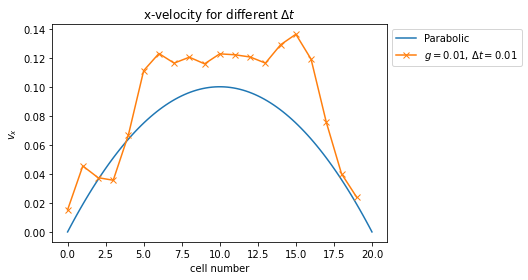

In [27]:
def viscosity(v_max, m = 1, av_N_c = 10, g = 0.01, D = 50):
    return (m * av_N_c * g * D**2) / (8 * v_max)

def parabolic_flow(y, D, v_max = 0.1):
    return (4 * v_max * (D - y) * y)/(D**2)

def getLastCell(data_from):
    path = "Data/" + data_from
    constants = getConstants(data_from)
    try:
        cells = pd.read_csv(path + f"cells_av{constants['avg']}_timestep{num_timesteps}.csv")
    except FileNotFoundError as f:
        cells = pd.read_csv(path + f"cells_av{constants['avg']}_timestep0{num_timesteps}.csv")
    return cells

def getLastCells(data_from, num):
    path = "Data/" + data_from
    constants = getConstants(data_from)
    start_timestep = num_timesteps - num
    cells = []
    for i in range(start_timestep + 1, num_timesteps + 1, 1):
        try:
            cells.append(pd.read_csv(path + f"cells_av{constants['avg']}_timestep{i}.csv"))
        except FileNotFoundError as f:
            cells.append(pd.read_csv(path + f"cells_av{constants['avg']}_timestep0{i}.csv"))
    return cells
    

y = np.linspace(0, y_dim, 100)
plt.plot(y, parabolic_flow(y, y_dim), label = 'Parabolic')

data_dirs = [''] #400x50_0.01g_0.05t/', '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
for config in data_dirs:
    constants = getConstants(config)
    cells = getLastCells(config, 50)
    velocities_i = pd.DataFrame()
    for t, cells_t in enumerate(cells):
        cells_t.set_index(['i', 'j'], inplace = True)
        velocities_i[f'{t}'] = cells_t['meanX'].groupby('i').mean()
    plt.plot(velocities_i.mean(axis = 1), '-x', label = '$g = {}$, $\Delta t = {}$'.format(constants['g'], constants['delta_t']))
plt.legend(bbox_to_anchor=(1,1))
plt.title('x-velocity for different $\Delta t$')
plt.ylabel('$v_x$')
plt.xlabel('cell number')
#plt.savefig('Assets/poseuille.png')
plt.show()

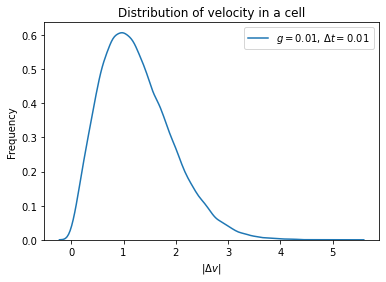

In [29]:
def getLastParticles(config):
    path = "Data/" + config
    constants = getConstants(config)
    particles = pd.read_csv(path + f"particles_av{constants['avg']}_timestep0{num_timesteps}.csv")
    return particles

def theoretical_dist(Delta_v, N_c, av_N_c = 10, m = 1, k_B = 1, T = 1):
    A = (m/(2 * math.pi * k_B * T * (1 - 1/N_c)))**(3/2)
    B = np.exp(-(m/(2 * k_B * T * (1 - 1/N_c))) * Delta_v**2)
    return A * B

def poisson_avg(Delta_v, max_sum = 1000, av_N_c = 10, m = 1, k_B = 1, T = 1):
    e = math.exp(-av_N_c)
    total = 0
    for N_c in range(2, max_sum):
        P = (av_N_c**N_c)/(math.factorial(N_c))
        N = theoretical_dist(Delta_v, N_c, m, k_B, T)
        total += P * (N)
    D = 1 - (av_N_c + 1) * e
    return e * total/D

data_dirs = [''] #400x50_0.01g_0.05t/, '400x50_0.01g_0.1t/', '400x50_0.01g_0.15t/', '400x50_0.01g_0.2t/'
fig, ax = plt.subplots(nrows = 1, ncols = 1)
for config in data_dirs:
    constants = getConstants(config)
    particles = getLastParticles(config)
    particles["i"] = (particles["y"] / constants["a"]).apply(lambda i: floor(i))
    particles["j"] = (particles["x"] / constants["a"]).apply(lambda i: floor(i))
    cells = getLastCell(config)
    complete = pd.merge(particles, cells, how = 'inner', on = ["i", "j"])
    complete["Delta_vx"] = complete["vx"] - complete["meanX"]
    complete["Delta_vy"] = complete["vy"] - complete["meanY"]
    complete["Delta_v"] = np.sqrt(complete["Delta_vx"]**2 + complete["Delta_vy"]**2)
    mid_i = (particles["i"] >= 1/4*y_dim) & (particles["i"] <= 35)
    subselection = complete.loc[mid_i]
    sns.kdeplot(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"]),
                ax = ax, label = '$g = {}$, $\Delta t = {}$'.format(constants["g"], constants["delta_t"]))
    #ax.plot(subselection["Delta_v"], poisson_avg(subselection["Delta_v"]/ math.sqrt(constants["k_BT"] / constants["m"])), 'o')# ,ax = ax
ax.legend()
ax.set_title('Distribution of velocity in a cell')
ax.set_ylabel('Frequency')
ax.set_xlabel('$|\Delta v|$')
plt.savefig("Assets/Delta_v_dist.png")
plt.show()

In [ ]:
def viscosity(v_max, m = 1, av_N_c = 10, g = 0.01, D = 50):
    return (m * av_N_c * g * D**2) / (8 * v_max)

def parabolic_flow(y, v_max = 1, D = 50):
    return (4 * v_max * (D - y) * y)/(D**2)

y = np.linspace(0, 50, 100)
plt.plot(y, parabolic_flow(y), label = 'Parabolic')
use = ['400x50_0.01g_0.1t/', '400x50_0.1g_0.1t/', '400x50_0.01g_0.2t/']

for config in use:
    constants = getConstants(config)
    
    cells_path = path + 'cells_av{}'.format(constants['avg'])
    columns = ['i', 'j', 'meanX', 'meanY', 'num']
    cells_timesteps = load_cells(cells_path, columns, constants['h']/constants['a'], constants['w']/constants['a'])
    I,J,U,V,pivots = prepare_cells(cells_timesteps, columns, shown_rows, shown_cols)
    
    rowsums = [row.sum()/len(row) for row in U[-1]]
    plt.plot(range(len(rowsums)), rowsums, "x-", label = f'$g = {constants['g']}, \Delta t = {constants['delta_t']}$')
    
plt.xlabel('Cell number')
plt.ylabel('x-Velocity')
plt.title('Velocity profile').format(timesteps)
plt.legend()
plt.savefig("Assets/velocity_profile.png")
#plt.close()

In [ ]:
v_2_t = [particles[['vx{}'.format(t), 'vy{}'.format(t)]]**2 for t in range(round(len(particles.columns)/4 - 1))]
#print(v_2_t)
avg_v_2_t = [v_2_particles.sum().sum()/len(v_2_particles) for v_2_particles in v_2_t]# first col sum, then row sum (sum vxs, then sum vys)
print('Average sqared velocities after first timestep:\n{}'.format(v_2_t[0].sum()/len(v_2_t[0])))
print('Average v_x2 after last timestep:\n{}'.format(v_2_t[-1].sum()/len(v_2_t[-1])))

particle_mass = float(constants['m'])

temp_t = np.array(avg_v_2_t)
plt.plot(temp_t)
#plot = sns.lineplot(data=temp_t)
plt.xlabel('Timestep')
plt.ylabel('average of v2')
plt.title('Temperature is increasing')
plt.xlim(0,1000)
plt.savefig('Assets/temperature.png')